In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2025-10-01 11:53:26.850845: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759341206.869364 1380430 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759341206.874796 1380430 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1759341206.889320 1380430 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1759341206.889345 1380430 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1759341206.889347 1380430 computation_placer.cc:177] computation placer alr

# Dataset MNIST

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, -1)  # [N,28,28,1]
x_test = np.expand_dims(x_test, -1)


In [ ]:
Familiarizarnos, conv, stride, polling, ...

In [34]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

# CNN model

In [37]:
inputs = tf.keras.Input(shape=(28,28,1))
x = tf.keras.layers.Conv2D(8, (3,3), activation="relu")(inputs)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(32, activation="relu")(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Training

In [38]:
model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.1)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7605 - loss: 0.8495 - val_accuracy: 0.9565 - val_loss: 0.1617
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9502 - loss: 0.1741 - val_accuracy: 0.9713 - val_loss: 0.1089
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9677 - loss: 0.1099 - val_accuracy: 0.9773 - val_loss: 0.0844
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9755 - loss: 0.0850 - val_accuracy: 0.9737 - val_loss: 0.0903
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9789 - loss: 0.0720 - val_accuracy: 0.9807 - val_loss: 0.0734
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9816 - loss: 0.0634 - val_accuracy: 0.9812 - val_loss: 0.0655
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9847 - loss: 0.0528 - val_accuracy: 0.9823 - val_loss: 0.0639
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9859 - loss: 0.0480 - val_accuracy: 0.

# Extraemos filtros de la primera capa

In [23]:
filters, biases = model.layers[1].get_weights()
print("Forma de los filtros:", filters.shape)

Forma de los filtros: (3, 3, 1, 8)


In [24]:
filters[:,:, 0, 0]

array([[-0.13380331,  0.24014363,  0.20334396],
       [ 0.37917832,  0.01245279,  0.24822968],
       [-0.3483699 , -0.29127902, -0.04950737]], dtype=float32)

# Visualizamos filtros y sus FFT

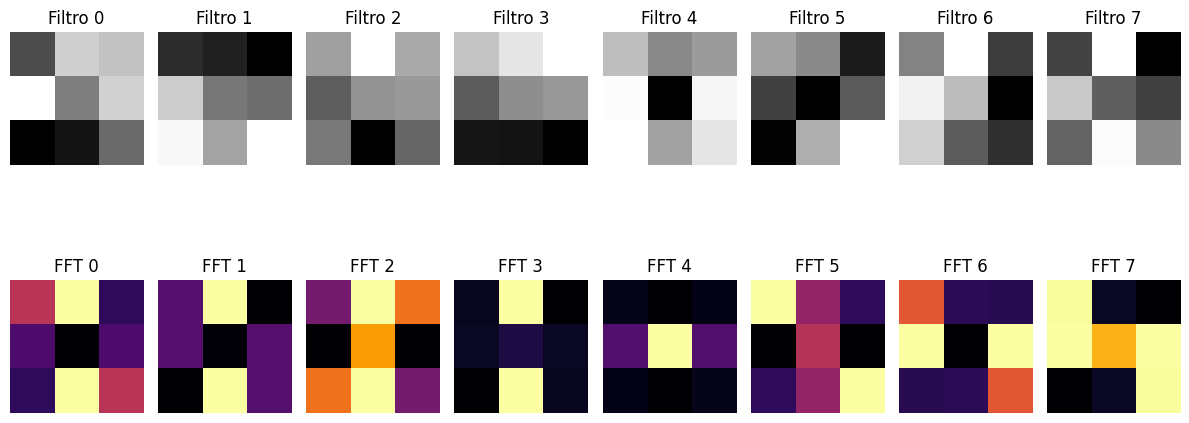

In [25]:
def fft2_magnitude(kernel):
    fft2 = tf.signal.fft2d(tf.cast(kernel, tf.complex64))
    return tf.abs(tf.signal.fftshift(fft2)).numpy()

plt.figure(figsize=(12,6))
for i in range(filters.shape[-1]):  # cada filtro
    f = filters[:, :, 0, i]

    # FFT del filtro
    f_fft = fft2_magnitude(f)

    # Plot filtro
    plt.subplot(2, filters.shape[-1], i+1)
    plt.imshow(f, cmap="gray")
    plt.axis("off")
    plt.title(f"Filtro {i}")

    # Plot FFT
    plt.subplot(2, filters.shape[-1], i+1+filters.shape[-1])
    plt.imshow(f_fft, cmap="inferno")
    plt.axis("off")
    plt.title(f"FFT {i}")

plt.tight_layout()
plt.show()


# Ejemplo de una convolución con una imagen

In [10]:
img = x_test[0:1]

In [27]:
first_layer = model.layers[1]

activation_model = tf.keras.Model(inputs=model.input,
                                  outputs=first_layer.output)

activations = activation_model.predict(img)

activations.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


(1, 26, 26, 8)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Forma de la activación: (1, 26, 26, 8)


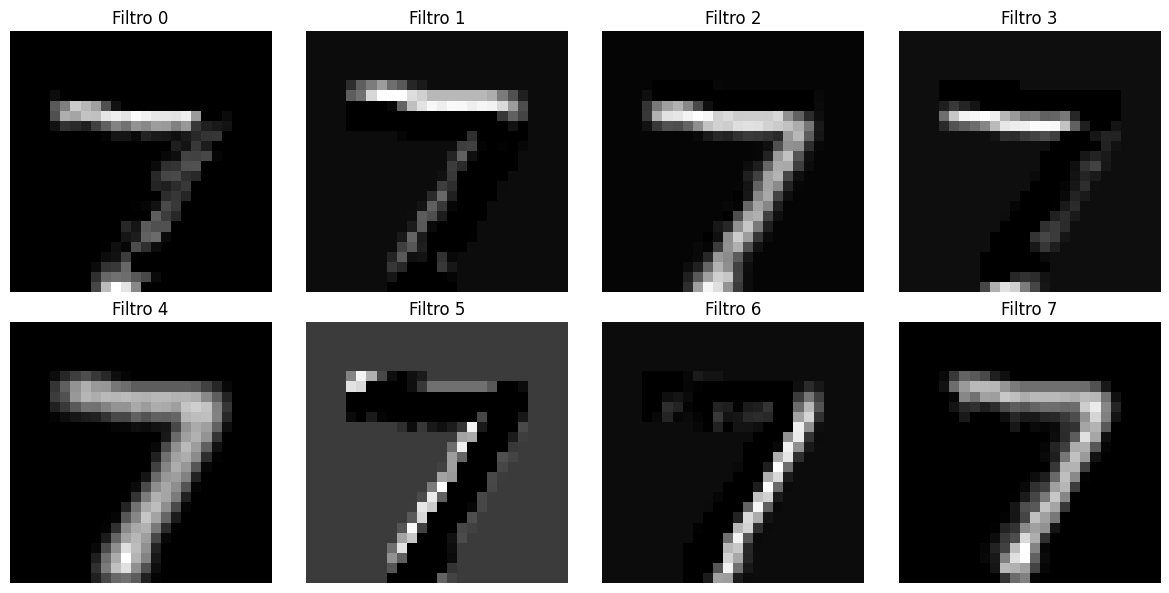

In [28]:
activations = activation_model.predict(img)

print("Forma de la activación:", activations.shape)

plt.figure(figsize=(12,6))
for i in range(activations.shape[-1]):
    plt.subplot(2, 4, i+1)
    plt.imshow(activations[0,:,:,i], cmap="gray")
    plt.axis("off")
    plt.title(f"Filtro {i}")

plt.tight_layout()
plt.show()

In [29]:
activations.shape

(1, 26, 26, 8)

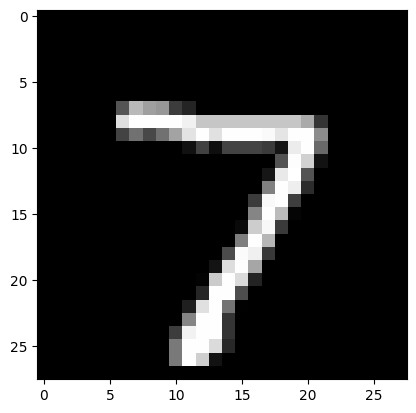

In [33]:
plt.imshow(img[0], cmap="gray")